# Research Question No. 2

## How frequent are long-lived bugs in FLOSS project?

## Experimental parameters


| Project                    |         #Reports     |       #Thesholds     |
|----------------------------|:--------------------:|:--------------------:|
| Eclipse                    |        9998         |         365          |
| GCC                        |        9998         |         365          |
| Gnome                      |        7991          |         365          |
| Freedesktop                |        7712          |         365          |
| Mozilla                    |        9998          |         365          |
| WineHQ                     |        6073          |         365          |

Every bug which its report have indicated that the number of days to resolve is less than or equal to **threshold fixed** was considered a **non-long lived bug** and that which the number of days to resolve is greater than this threshold was considered as a **long-live bug**. 

## Step1. Setup environment.

In [5]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [30]:
import matplotlib.pyplot as plt 
import nltk 
import numpy as np
import os 
import pandas as pd
import seaborn as sns 
import string

from nltk.stem   import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Setup Seaborn
sns.set_context("paper")
sns.set(style="ticks", color_codes=True, font_scale=2)

# Setup Matplotlib
plt.rc('figure', figsize=(20, 20))
plt.style.use('default')
SMALL_SIZE  = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 14
plt.rc('font',   size=SMALL_SIZE)       # controls default text sizes
plt.rc('axes',   titlesize=SMALL_SIZE)  # fontsize of the axes title
plt.rc('axes',   labelsize=SMALL_SIZE)  # fontsize of the x and y labels
plt.rc('xtick',  labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc('ytick',  labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)   # legend fontsize
plt.rc('figure', titlesize=SMALL_SIZE)  # fontsize of the figure title
#%matplotlib inline 

# Setup NLTK
stemmer = PorterStemmer()
nltk.download('punkt')
nltk.download('stopwords')

# Path of the file to read.
projects = ['eclipse', 'freedesktop', 'gnome', 'mozilla', 'gcc', 'winehq']

# Fixed time threshold.
bug_fix_time_threshold = 365
print("Setup complete")

Setup complete


[nltk_data] Downloading package punkt to /home/gomes/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/gomes/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Step 2. Load data.

In [35]:
bug_reports_path = f"datasets/bug_reports_all_data.csv"
bug_reports_all_data = pd.read_csv(bug_reports_path)

## Step 3. Exploring data analysis

In [37]:
bug_reports_all_data['project'].value_counts()

mozilla        9998
eclipse        9998
gcc            9998
gnome          7991
freedesktop    7712
winehq         6073
Name: project, dtype: int64

In [38]:
bug_reports_all_data.head()

,bug_id,creation_date,component_name,product_name,short_description,long_description,assignee_name,reporter_name,resolution_category,resolution_code,...,quantity_of_comments,resolution_date,bug_fix_time,severity_category,severity_code,project,short_description_words,long_description_words,long_lived?,file_size
0,EMF-354412,2011-08-10,cdo.core,EMF,containsAll returns wrong result in case of de...,Cloned from: 354395: containsAll returns wrong...,stepper,stepper,fixed,1,...,5,2011-08-10,0,normal,2,eclipse,7,52,short-lived,0.018005
1,JSDT-253166,2008-11-03,General,JSDT,Javascript validation has several errors with ...,Some of our javascript-files yield parse-error...,cmjaun,acm,fixed,1,...,6,2009-04-29,177,normal,2,eclipse,6,75,short-lived,0.007505
2,ECLIPSELINK-338573,2011-03-01,SDO,ECLIPSELINK,Memory Improvement: Reduce the instances of S...,Currently the SDO/OXM metadata is referring to...,blaise.doughan,blaise.doughan,fixed,1,...,5,2011-03-02,1,normal,2,eclipse,5,13,short-lived,0.013511
3,BIRT-150200,2006-07-10,Chart,BIRT,Stacked Area Chart: fill.set() ignored in befo...,In the attached report the fill.set() is being...,nli,eclipse,fixed,1,...,7,2006-08-29,50,major,4,eclipse,6,15,short-lived,0.054118
4,PAPYRUS-384964,2012-07-12,Core,PAPYRUS,[StateMachine Diagram] Papyrus does not forbid...,In some situation (seem to be when an element ...,ansgar.radermacher,yann.tanguy,fixed,1,...,3,2013-04-02,264,critical,5,eclipse,6,29,short-lived,0.062972


In [39]:
bug_reports_all_data.loc[bug_reports_all_data['project']=='eclipse'].nlargest(10, 'bug_fix_time')

,bug_id,creation_date,component_name,product_name,short_description,long_description,assignee_name,reporter_name,resolution_category,resolution_code,...,quantity_of_comments,resolution_date,bug_fix_time,severity_category,severity_code,project,short_description_words,long_description_words,long_lived?,file_size
5033,PLATFORM-34970,2003-03-13,SWT,PLATFORM,[Program] System editor not found in HP-UX 11.00,Problem description:\nOn HP-UX 11.00 selecting...,billy.biggs,rhounsel,fixed,1,...,12,2016-10-11,4961,normal,2,eclipse,6,57,long-lived,0.006930
5644,PLATFORM-143992,2006-05-26,UI,PLATFORM,Deprecate the org.eclipse.core.commands.util p...,RC5\n\norg.eclipse.core.commands.util is marke...,Lars.Vogel,Tod_Creasey,fixed,1,...,11,2019-02-05,4638,normal,2,eclipse,5,13,long-lived,0.006877
2061,PLATFORM-185247,2007-05-02,Resources,PLATFORM,JUnit tests for recursive symlinks,Build: I20070501-0010\n\nThe fix for bug 10555...,simeon.danailov.andreev,john.arthorne,fixed,1,...,13,2018-11-23,4223,normal,2,eclipse,4,17,long-lived,0.011772
9213,JDT-68233,2004-06-22,Debug,JDT,Null Pointer in JavaBreakpoint,I was using RC3 and doing hyades development h...,sarika.sinha,aaron,fixed,1,...,7,2015-10-19,4136,normal,2,eclipse,3,109,long-lived,0.006233
616,JDT-86726,2005-02-25,Text,JDT,[formatting] 'New line after @param tags' not ...,After uncheck the New line after @param tags t...,jdt-text-inbox,nqw2000,fixed,1,...,4,2016-01-08,3969,normal,2,eclipse,6,42,long-lived,0.003409
579,PLATFORM-80900,2004-12-14,UI,PLATFORM,[PerspectiveBar] Platform does not remember or...,Using I200412081200\n\nMostly using the follow...,platform-ui-triaged,erol_koc_OTI,fixed,1,...,4,2015-09-19,3931,normal,2,eclipse,6,28,long-lived,0.003165
3500,WTP_SERVERTOOLS-218633,2008-02-12,wst.server,WTP_SERVERTOOLS,Modifying the Server Host name results in one ...,Build ID: I20071213-1700\n\nSteps To Reproduce...,eyuen,ktsao,fixed,1,...,15,2018-11-15,3929,normal,2,eclipse,12,24,long-lived,0.010682
6561,PLATFORM-53988,2004-03-07,UI,PLATFORM,[Dialogs] New (Source) Folder dialog does not ...,Reached through:\n\nProperties of a Java proje...,platform-ui-triaged,sdavids,fixed,1,...,8,2014-06-26,3763,normal,2,eclipse,7,17,long-lived,0.018563
3476,NEBULA-268499,2009-03-13,Core,NEBULA,[Component-Proposal] CTreeCombo-Widget,Some time ago I write CTreeCombo widget (I sim...,laurent.caron,tom.schindl,fixed,1,...,5,2019-03-25,3664,normal,2,eclipse,2,18,long-lived,0.003527
9743,PDE-255266,2008-11-13,Build,PDE,Compare map files to suggest version changes,There is a general problem of version numbers ...,pde-build-inbox,andrew.niefer,fixed,1,...,7,2018-11-12,3651,normal,2,eclipse,6,49,long-lived,0.006041


In [40]:
from numpy import percentile
for project in projects:
    display(project)
    bug_reports_data = bug_reports_all_data.loc[bug_reports_all_data['project']==project]
    display(bug_reports_data['bug_fix_time'].describe())
    q25, q75 = percentile(bug_reports_data['bug_fix_time'], 25), percentile(bug_reports_data['bug_fix_time'], 75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    
    print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
    outliers =  [x for x in bug_reports_data['bug_fix_time'] if x < lower or x > upper]
    # identify outliers
    outliers = [x for x in bug_reports_data['bug_fix_time'] if x < lower or x > upper]
    print('Identified outliers: %.3f' % (len(outliers)/len(bug_reports_data)*100))

'eclipse'

count    9998.000000
mean      108.538708
std       317.687949
min         0.000000
25%         1.000000
50%         8.000000
75%        63.000000
max      4961.000000
Name: bug_fix_time, dtype: float64

Percentiles: 25th=1.000, 75th=63.000, IQR=62.000
Identified outliers: 15.203


'freedesktop'

count    7712.000000
mean      173.236385
std       384.633005
min         0.000000
25%         3.000000
50%        28.000000
75%       162.000000
max      4896.000000
Name: bug_fix_time, dtype: float64

Percentiles: 25th=3.000, 75th=162.000, IQR=159.000
Identified outliers: 12.254


'gnome'

count    7991.000000
mean      202.465524
std       475.371999
min         0.000000
25%         2.000000
50%        23.000000
75%       162.000000
max      5577.000000
Name: bug_fix_time, dtype: float64

Percentiles: 25th=2.000, 75th=162.000, IQR=160.000
Identified outliers: 13.302


'mozilla'

count    9998.000000
mean      278.055011
std       661.505883
min         0.000000
25%         3.000000
50%        24.000000
75%       187.750000
max      7294.000000
Name: bug_fix_time, dtype: float64

Percentiles: 25th=3.000, 75th=187.750, IQR=184.750
Identified outliers: 15.503


'gcc'

count    9998.000000
mean      337.904081
std       591.241826
min         0.000000
25%         5.000000
50%        63.000000
75%       475.000000
max      6898.000000
Name: bug_fix_time, dtype: float64

Percentiles: 25th=5.000, 75th=475.000, IQR=470.000
Identified outliers: 6.181


'winehq'

count    6073.00000
mean      491.18327
std       667.48611
min         0.00000
25%        22.00000
50%       220.00000
75%       709.00000
max      5636.00000
Name: bug_fix_time, dtype: float64

Percentiles: 25th=22.000, 75th=709.000, IQR=687.000
Identified outliers: 6.158


In [41]:
bug_reports_all_data.groupby('project').agg({'creation_date':[np.min, np.max]})

creation_date            
                     amin        amax
project                              
eclipse        2001-10-10  2018-01-30
freedesktop    2003-02-05  2019-08-15
gcc            1999-08-26  2018-01-31
gnome          1999-01-02  2018-01-24
mozilla        1998-04-15  2014-04-22
winehq         2000-09-27  2018-04-17

### Step 4. Bug Fixing Time Distribution

<Figure size 640x480 with 0 Axes>

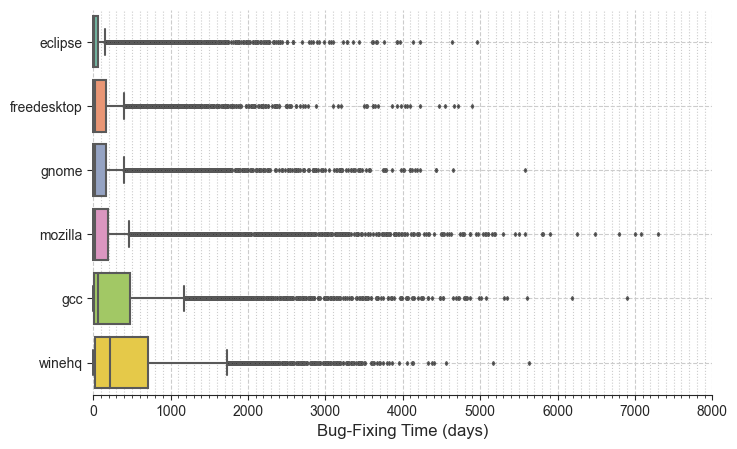

In [42]:
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
sns.despine(offset=10)
sns.set_style("ticks")
threshold = 8000

fig, ax = plt.subplots(figsize=(8, 5))
df = bug_reports_all_data.loc[(bug_reports_all_data["bug_fix_time"] < threshold)] 
g  = sns.boxplot(data=df, x="bug_fix_time", y="project", palette="Set2", ax=ax, showfliers = True, flierprops = dict(markerfacecolor = '.10', markersize = 2))
plt.ylabel("", fontsize= 12)
plt.xlabel("Bug-Fixing Time (days)", fontsize= 12)
plt.title("", fontsize= 15)
ax.yaxis.grid(True)
ax.grid(which='major', color='#CCCCCC', linestyle='--')
ax.grid(which='minor', color='#CCCCCC', linestyle=':')
ax.xaxis.set_major_locator(MultipleLocator(1000))
ax.xaxis.set_minor_locator(AutoMinorLocator(10))
ax.set(xlim=( -10, threshold))
sns.despine(trim=True, left=True)
plt.savefig(f"figures/rq2-bug-fix-time-distribution.pdf", format="pdf", dpi=600, bbox_inches='tight')

### Step 5. How frequent are long-lived bugs?

In [45]:
def plot_pyramid (data, column, filename):
  
    top_g = data.groupby(column)[column].agg(['count'])
    top_s = top_g.sort_values('count', ascending=False)
    top_n = data.loc[data[column].isin(top_s.index)].groupby(column)['long_lived?'].value_counts(normalize=True).unstack()
    top_n.fillna(0, inplace=True)
    
    top_n.reset_index(inplace=True)
    top_n = top_n.sort_values('long-lived', ascending=True)
    
    print(top_n)
    
    fig, axes = plt.subplots(figsize=(10, 10), ncols=2, sharey=False, gridspec_kw = {'wspace':0, 'hspace':0})

    plt.rcParams["axes.grid.axis"] ="x"
    plt.rcParams["axes.grid"] = True

    sns.despine(offset=0.5)
    sns.barplot(x="long-lived", y=column, color="tab:red", ax=axes[0], data=top_n)
    sns.barplot(x="short-lived", y=column,  color="tab:blue", ax=axes[1], data=top_n)
    
    axes[0].set(xlim=(0, 1))
    axes[0].invert_xaxis()
    axes[0].spines['left'].set_visible(False)
    axes[0].tick_params(axis="x", labelsize=MEDIUM_SIZE+3)
    axes[0].tick_params(axis="y", labelsize=MEDIUM_SIZE+3)
    axes[0].set_ylabel(column.title().replace("_", " ").replace("Category", "Level"), fontsize=MEDIUM_SIZE+2)
    axes[0].set_xlabel("Long-lived", fontsize=MEDIUM_SIZE+3)    
    axes[0].set_xticklabels(['{:,.0%}'.format(x) for x in axes[0].get_xticks()])
    
    axes[1].set(xlim=(0, 1))
    axes[1].set_yticks([])
    axes[1].set(ylabel="")
    axes[1].tick_params(axis="x", labelsize=MEDIUM_SIZE+3)
    axes[1].set_xlabel("Short-lived", fontsize=MEDIUM_SIZE+3)
    axes[1].set_xticklabels(['{:,.0%}'.format(x) for x in axes[1].get_xticks()])
    
    #sns.despine(offset=0.5)
    s = axes[1].twinx()
    labels = [i.get_text() for i in axes[0].get_yticklabels()]
    labels_new = [top_s.loc[top_s.index==i, 'count'].values[0] for i in labels]
    s.set_yticks(axes[0].get_yticks())
    s.set_ylim(axes[0].get_ylim())
    s.set_yticklabels(labels_new)
    s.tick_params(axis="y", labelsize=MEDIUM_SIZE+3)
    
    s.spines['top'].set_visible(False)
    s.spines['bottom'].set_visible(False)
    s.spines['right'].set_visible(False)
    s.spines['left'].set_visible(False)
        
    #fig.suptitle(project, fontsize=BIGGER_SIZE)
    plt.savefig(f"figures/{filename}", format="pdf", dpi=600, bbox_inches='tight')

def plot_bar (data, filename):
    
    top_g = data.groupby("project")["project"].agg(['count'])
    top_s = top_g.sort_values('count', ascending=False)
    top_n = data.loc[data['project'].isin(top_s.index)].groupby('project')['long_lived?'].value_counts(normalize=True).unstack()
    
    plt.figure(figsize=(20,20))
    fig, axis = plt.subplots(figsize=(10, 10)) 
    
    sns.despine(offset=5)
    primary   = top_n.plot(kind='barh', stacked='True',  grid='True', color=["tab:red", "tab:blue"], ax=axis)
    secondary = primary.twinx()
    
    labels = [i.get_text() for i in primary.get_yticklabels()]
    labels_new = [top_s.loc[top_s.index==i, 'count'].values[0] for i in labels]
    
    primary.set(xlim=(0, 1))
    primary.set_xlabel('percentage', fontsize=MEDIUM_SIZE)
    primary.set_ylabel('FLOSS Projects', fontsize=MEDIUM_SIZE) 
    primary.set_title("project", fontsize=BIGGER_SIZE)
    primary.tick_params(axis="y", labelsize=MEDIUM_SIZE)
    primary.tick_params(axis="x", labelsize=MEDIUM_SIZE)
    
    secondary.set_yticks(primary.get_yticks())
    secondary.set_ylim(primary.get_ylim())
    secondary.set_yticklabels(labels_new)
    secondary.tick_params(axis="y", labelsize=MEDIUM_SIZE)
    
    plt.savefig(f"figures/{filename}", format="pdf", dpi=600, bbox_inches='tight')


long_lived?      project  long-lived  short-lived
0                eclipse    0.076615     0.923385
1            freedesktop    0.136411     0.863589
3                  gnome    0.144162     0.855838
4                mozilla    0.180636     0.819364
2                    gcc    0.291558     0.708442
5                 winehq    0.406883     0.593117


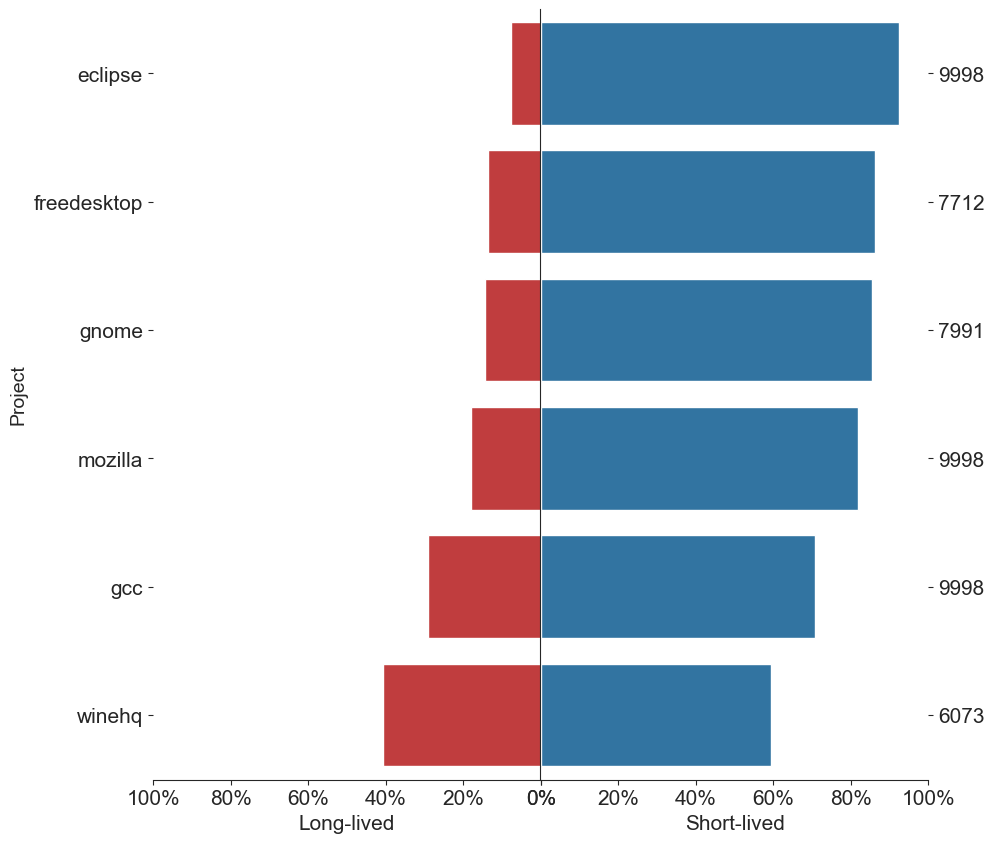

In [46]:
plot_pyramid(bug_reports_all_data, 'project', 'rq2-all-percentage-of-long-lived-bugs.pdf')